In [1]:
#cleaning and data exploration
import pandas as pd
import numpy as np
from sklearn import cluster 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
from pandas.compat import StringIO
os.chdir('/Users/Wizard/Canopy/')
os.getcwd()
#resetting window size
pd.util.terminal.get_terminal_size()
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)

In [2]:
#loading train test file
df_train = pd.read_csv('Kaggle/Titanic/data/train.csv')
df_test = pd.read_csv('Kaggle/Titanic/data/test.csv')
#df_m = pd.read_csv('Kaggle/RussianReal_estate/Test/macro.csv', parse_dates=['timestamp'])

In [3]:
df = [df_train, df_test]
for i in df:  
    #embarked
    i.loc[i['Embarked'].isnull(), 'Embarked'] = 'S'
    #sex
    i['Sex'] = i['Sex'].map({'male':1, 'female':0})
    #age
    i.loc[i['Age'].isnull(), 'Age'] = np.random.randint(i['Age'].mean()-i['Age'].std(),i['Age'].mean()+i['Age'].std(), size = i['Age'].isnull().sum())  
    i.loc[i['Age']<21, 'Age'] = 0
    i.loc[(i['Age']>=21) & (i['Age']<29), 'Age'] = 1
    i.loc[(i['Age']>=29) & (i['Age']<38), 'Age'] = 2
    i.loc[(i['Age']>=38), 'Age'] = 3
    i['Age']= i['Age'].astype(int)
    #fare
    i.loc[i['Fare'].isnull(), 'Fare'] = i['Fare'].median()
    i.loc[i['Fare']<8, 'Fare'] = 0
    i.loc[(i['Fare']>=8) & (i['Fare']<15), 'Fare'] = 1
    i.loc[(i['Fare']>=15) & (i['Fare']<31), 'Fare'] = 2
    i.loc[(i['Fare']>=31), 'Fare'] = 3
    i['Fare']= i['Fare'].astype(int)
    #siblings, members
    i['family'] = i['SibSp']+i['Parch']+1
    i['IsAlone'] = 0
    i.loc[(i['family']==1), 'IsAlone'] = 1
    #cabin    
for i in df:  
    i['Cabin'] = i['Cabin'].apply(lambda x:0 if type(x)==float else 1)

#-----------------------------#-----------------------------    
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1,'S':2})

#for i in df:  
#    i['family'] = i['family'].apply(lambda x:4 if x>3 else x)

In [4]:
#null check
print df_train.Embarked.isnull().sum()
print df_test.Embarked.isnull().sum()
print df_train.Embarked.value_counts()
print df_test.Embarked.value_counts()

#Value counts, distribution check
col = ['Survived', 'Pclass','Sex','Age','Fare','Cabin','Embarked','family','IsAlone']
for i in col:
    print df_train[i].value_counts()

0
0
2    646
0    168
1     77
Name: Embarked, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
1    231
3    224
2    219
0    217
Name: Age, dtype: int64
0    241
3    225
1    216
2    209
Name: Fare, dtype: int64
0    687
1    204
Name: Cabin, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64
1    537
0    354
Name: IsAlone, dtype: int64


In [5]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
#df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

None
None
None


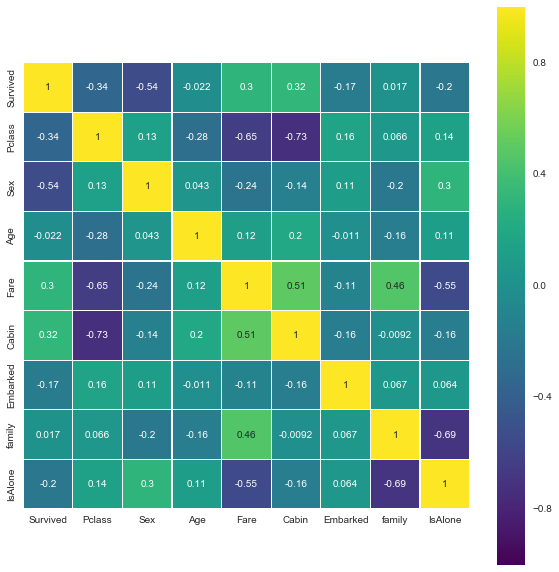

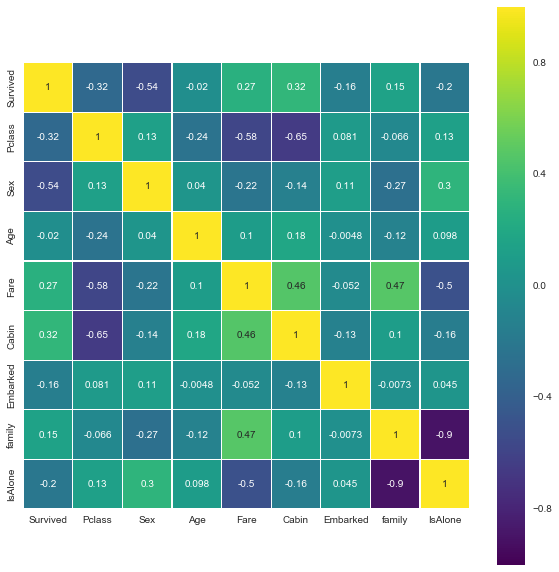

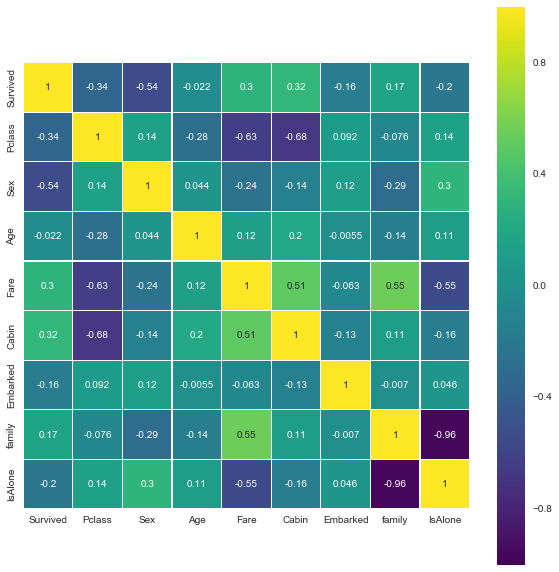

In [6]:
#correlation, pearson, kendall, spearman 
def corrplot(meth):
    colormap = plt.cm.viridis
    plt.figure(figsize = (10, 10))
    sns.heatmap(df_train.astype(float).corr(method = meth), annot=True, linewidths = 0.1, linecolor = 'White',cmap = colormap, square = True, xticklabels = True)
print corrplot('pearson')
print corrplot('kendall') 
print corrplot('spearman') 

In [7]:
y_train = df_train['Survived'].values
x_train = df_train.drop(['Survived'], axis=1).values                      

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver ='liblinear')
LR.fit(x_train,y_train)
predict  = LR.predict(x_train)
LR.score(x_train,y_train)
LR.predict_proba(x_train)

array([[ 0.90004706,  0.09995294],
       [ 0.06736655,  0.93263345],
       [ 0.42567884,  0.57432116],
       ..., 
       [ 0.37171448,  0.62828552],
       [ 0.45096324,  0.54903676],
       [ 0.90745772,  0.09254228]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(x_train,y_train)
random_forest.score(x_train,y_train)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LR, n_estimators = 10, max_samples=0.3, max_features=0.8, bootstrap = True)
bagging.fit(x_train,y_train)
bagging.score(x_train,y_train)

In [9]:
#Validation methods, Logistic_regression
#Confusion_matrix
from sklearn import metrics
metrics.confusion_matrix(y_train, predict)

array([[473,  76],
       [ 96, 246]])

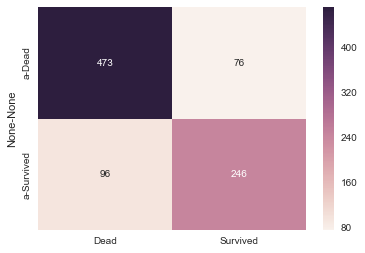

In [32]:
# 1.1 - Confusion matrix
A = pd.DataFrame(metrics.confusion_matrix(y_train, predict), \
                 index = [['a','a'],['Dead','Survived']], columns =['Dead','Survived'])
sns.heatmap(A, annot= A, fmt="d")
#cant do multi indexing, need some hack for this

In [37]:
# 1.2 - Gain and Lift charts
#using learning curve
from sklearn.learning_curve import learning_curve
import numpy
numpy.linspace(0,4,5)

array([ 0.,  1.,  2.,  3.,  4.])

In [42]:
#https://gist.github.com/dsal1951/896868a448490f90516a3d241f1fdf4f
df_train['bin'] = pd.qcut(range(len(df_train)), 10).labels
df_train
def gainchart(df, cuts, ):
    for i in range(cuts):
        LR = LogisticRegression(solver ='liblinear')
        LR.fit(x_train,y_train)
predict  = LR.predict(x_train)
LR.score(x_train,y_train)

/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family,IsAlone,bin
0,0,3,1,1,0,0,2,2,0,0
1,1,1,0,3,3,1,0,2,0,0
2,1,3,0,1,0,0,2,1,1,0
3,1,1,0,2,3,1,2,2,0,0
4,0,3,1,2,1,0,2,1,1,0
5,0,3,1,0,1,0,1,1,1,0
6,0,1,1,3,3,1,2,1,1,0
7,0,3,1,0,2,0,2,5,0,0
8,1,3,0,1,1,0,2,3,0,0
9,1,2,0,0,2,0,0,2,0,0


In [52]:
#https://rasbt.github.io/mlxtend/user_guide/evaluate/lift_score/
def calc_lift(x,y,clf,bins=10):
    #Actual Value of y
    y_actual = y
    #Predicted Probability that y = 1
    y_prob = clf.predict_proba(x)
    #Predicted Value of Y
    y_pred = clf.predict(x)
    cols = ['ACTUAL','PROB_POSITIVE','PREDICTED']
    data = [y_actual,y_prob[:,1],y_pred]
    df = pd.DataFrame(dict(zip(cols,data)))
    
    #Observations where y=1
    total_positive_n = df['ACTUAL'].sum()
    #Total Observations
    total_n = df.index.size
    natural_positive_prob = total_positive_n/float(total_n)

    #Create Bins where First Bin has Observations with the
    #Highest Predicted Probability that y = 1
    df['BIN_POSITIVE'] = pd.qcut(df['PROB_POSITIVE'],bins,labels=False)
    
    pos_group_df = df.groupby('BIN_POSITIVE')
    #Percentage of Observations in each Bin where y = 1 
    lift_positive = pos_group_df['ACTUAL'].sum()/pos_group_df['ACTUAL'].count()
    lift_index_positive = (lift_positive/natural_positive_prob)*100
    #Consolidate Results into Output Dataframe
    lift_df = pd.DataFrame({'LIFT_POSITIVE':lift_positive,'LIFT_POSITIVE_INDEX':lift_index_positive,
                               'BASELINE_POSITIVE':natural_positive_prob})
    return lift_df

In [242]:
#lift score, get it from here
#https://rasbt.github.io/mlxtend/user_guide/evaluate/lift_score/
#mlxtend library -- Very Useful
#from mlxtend.evaluate import lift_score

In [202]:
calc_lift(x_train, y_train,LR,bins=10)

,BASELINE_POSITIVE,LIFT_POSITIVE,LIFT_POSITIVE_INDEX
BIN_POSITIVE,,,
0,0.383838,0.085714,22.330827
1,0.383838,0.148649,38.726885
2,0.383838,0.085106,22.172452
3,0.383838,0.095238,24.812030
4,0.383838,0.258427,67.327025
5,0.383838,0.287234,74.832027
6,0.383838,0.482353,125.665635
7,0.383838,0.647727,168.750000
8,0.383838,0.808989,210.762862


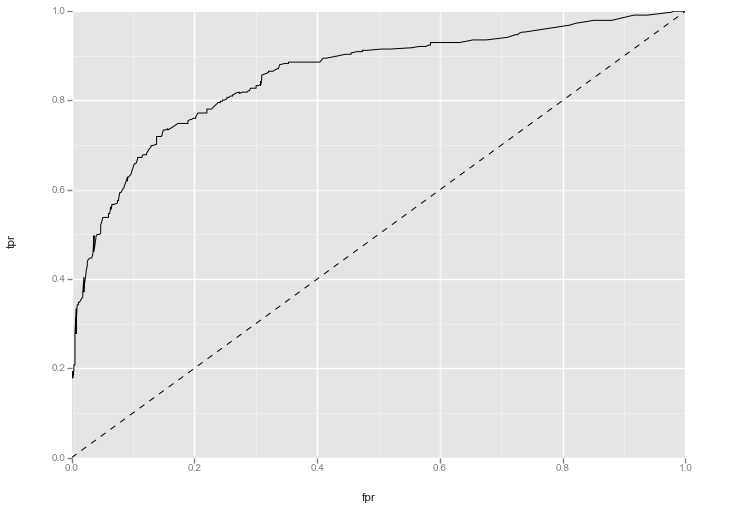

<ggplot: (288958489)>


In [244]:
#validation 1.3 roc curve
#http://blog.yhat.com/posts/roc-curves.html
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#!pip install ggplot
from ggplot import *
preds = LR.predict_proba(x_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_train, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
print ggplot(df, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')

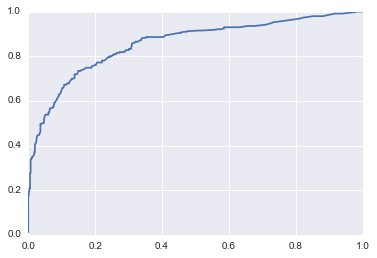

In [245]:
plt.plot(fpr, tpr)
plt.show()

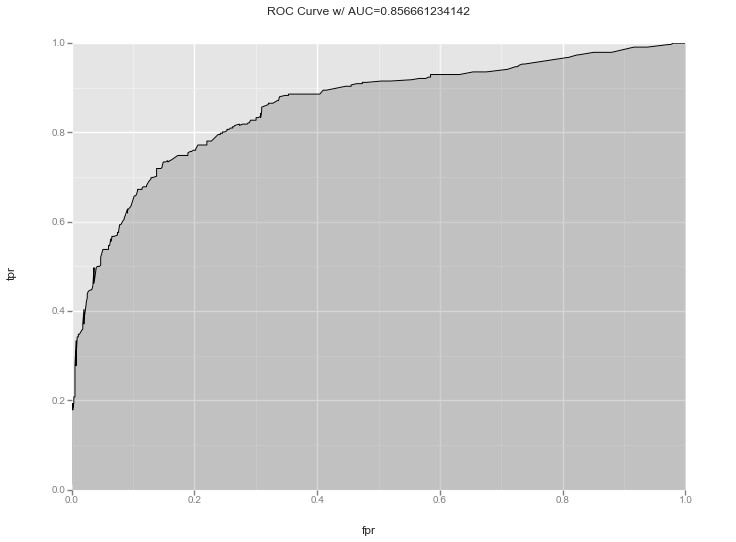

<ggplot: (287576721)>

In [98]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', y='tpr'))+ geom_area(alpha=0.2)+geom_line(aes(y='tpr'))+ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [101]:
#1.4 Gini coefficients
AUC = metrics.roc_auc_score(y_train, predict)
Gini = 2*AUC-1
#should be more than 60%

In [103]:
#r code
#https://discuss.analyticsvidhya.com/t/how-to-get-the-percentage-concordant-and-discordant-values-for-a-logistic-regression-model-in-r/1458/2
#decision function?? distance calculates from decision boundary
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver ='liblinear')
LR.fit(x_train,y_train)
predict  = LR.predict(x_train)
LR.score(x_train,y_train)
LR.decision_function(x_train)

array([ -2.19774761e+00,   2.62786361e+00,   2.99503576e-01,
         2.53484504e+00,  -2.09881478e+00,  -1.49197623e+00,
        -2.25892334e-01,  -2.34402349e+00,   3.09958880e-01,
         1.85798700e+00,   1.66432167e+00,   1.94829431e+00,
        -1.65055137e+00,  -3.37760426e+00,   5.23635281e-01,
         8.48764369e-01,  -2.53741207e+00,  -1.33851073e+00,
         7.80532671e-01,   8.40785557e-01,  -1.44403235e+00,
        -9.99284831e-01,   1.02495220e+00,   2.22371074e-01,
         1.72904935e-01,  -8.60675829e-01,  -2.34853798e+00,
        -9.41674841e-01,   6.82210419e-01,  -2.44155656e+00,
        -1.03897314e+00,   2.85199531e+00,   4.58078715e-01,
        -2.01090584e+00,  -2.28290713e-01,  -9.93704398e-01,
        -2.12440628e+00,  -1.87468307e+00,   8.76832364e-01,
         1.20320458e+00,   2.13659187e-01,   1.31670502e+00,
        -2.34853798e+00,   1.49680135e+00,   6.82210419e-01,
        -1.87468307e+00,  -1.35368891e+00,   9.81530578e-03,
        -1.32294579e+00,

In [122]:
#KS
import scipy
#scipy.stats.kstest , its a test to check distributions, whuich under null hypo says - the distributions are identical
#an alternative is two tailed tests
#https://statcompute.wordpress.com/2012/11/18/calculating-k-s-statistic-with-python/

#prerequisite: 
#original values, predicted values.
#every class, predicted right and predicted wrong
#--prior probablities, check if required?
#quantiles, %right vs % wrong
#cumulative order
#K-S = cum.right - cum.wrong
#step 1 

In [195]:
#code
predict = LR.predict(x_train)
df_ks = pd.DataFrame({'train': y_train, 'predict':predict})
df_ks['bucket'] = pd.qcut(range(len(df_ks)), 10).labels
dfbin = pd.DataFrame(df_ks.groupby('bucket').apply(lambda x: len(x[x.predict!=x.train])/(1.0*len(x))))
dfbin

/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 'labels' is deprecated. Use 'codes' instead


,0
bucket,
0,0.188889
1,0.202247
2,0.224719
3,0.157303
4,0.235955
5,0.191011
6,0.202247
7,0.179775
8,0.157303


In [196]:
dfbin['false'] = df_ks.groupby('bucket').apply(lambda x: len(x[x.predict!=x.train]))

In [197]:
dfbin['total'] = df_ks.groupby('bucket').apply(lambda x: len(x))

In [203]:
dfbin['right'] = dfbin.total - dfbin.false
dfbin['right%'] = dfbin.right/(1.0*dfbin.right.sum())
dfbin['false%'] = dfbin.false/(1.0*dfbin.false.sum())
dfbin['rightcum']  = dfbin['right%'].cumsum()
dfbin['falsesum']  = dfbin['false%'].cumsum()
dfbin['ks'] = dfbin['right%'] - dfbin['false%']
dfbin
###########sort of right but not exactly, why , use ranking and gain/lift########
#dfbin.sort('right%', ascending=False)

,0,false,total,right,right%,false%,ks,rightcum,falsesum
bucket,,,,,,,,,
0,0.188889,17,90,73,0.101530,0.098837,0.002693,0.101530,0.098837
1,0.202247,18,89,71,0.098748,0.104651,-0.005903,0.200278,0.203488
2,0.224719,20,89,69,0.095967,0.116279,-0.020312,0.296245,0.319767
3,0.157303,14,89,75,0.104312,0.081395,0.022916,0.400556,0.401163
4,0.235955,21,89,68,0.094576,0.122093,-0.027517,0.495132,0.523256
5,0.191011,17,89,72,0.100139,0.098837,0.001302,0.595271,0.622093
6,0.202247,18,89,71,0.098748,0.104651,-0.005903,0.694019,0.726744
7,0.179775,16,89,73,0.101530,0.093023,0.008507,0.795549,0.819767
8,0.157303,14,89,75,0.104312,0.081395,0.022916,0.899861,0.901163


In [239]:
#concordance pair, 
#create a df with y train and predicted
df_cc = pd.DataFrame({'train': y_train, 'predict':predict})
df_cc_one = df_cc[df_cc.predict ==1]
df_cc_o = df_cc[df_cc.predict ==0]

pairs_tested = 0
conc = 0
ties = 0
disc = 0
for i in range(len(df_cc_one)):
    for j in range(len(df_cc_o)):
        pairs_tested = pairs_tested+1
        if (df_cc_one.iloc[i,1] > df_cc_o.iloc[j,1]):
            conc=conc+1
        elif df_cc_one.iloc[i,1] == df_cc_o.iloc[j,1]:
            ties = ties+1
        else:
            disc = disc+1

print pairs_tested, conc, ties, disc      
concordance = (1.0*conc)/pairs_tested
discordance = (1.0*disc)/pairs_tested
ties_perc = (1.0*ties)/pairs_tested                 
print concordance, discordance, ties_perc
#####-----note----#####very slow and laaggy program, not really sure of the output as well 

183218 116358 59564 7296
